In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df = pd.read_csv('../output/discovery_global.csv')

In [3]:
df.head()

,Unnamed: 0,image,video_path,title,duration,views,date_posted
0,0,https://i.ytimg.com/vi/Q_6v-jh1Z5k/hqdefault.j...,/watch?v=Q_6v-jh1Z5k,The World Is Still Awesome (Boom De Yada 2020)...,\n 1:01\n,13K views,2 days ago
1,1,https://i.ytimg.com/vi/Cgwp2OEVsrc/hqdefault.j...,/watch?v=Cgwp2OEVsrc,Naked in Shark Infested Waters | Naked and Afr...,\n 10:49\n,11K views,3 days ago
2,2,https://i.ytimg.com/vi/EYLNGrHpXeo/hqdefault.j...,/watch?v=EYLNGrHpXeo,Josh Harris Reels in 130lb Ahi Tuna! | Deadli...,\n 10:04\n,24K views,6 days ago
3,3,https://i.ytimg.com/vi/PNmtxsNAiYA/hqdefault.j...,/watch?v=PNmtxsNAiYA,Josh and Casey's HUGE Crab Haul | Deadliest Catch,\n 2:18\n,57K views,1 week ago
4,4,https://i.ytimg.com/vi/U1QmSyrtQs0/hqdefault.j...,/watch?v=U1QmSyrtQs0,The All-Stars Reach Extraction! | Naked and Af...,\n 11:23\n,34K views,1 week ago


In [4]:
df['title_lower'] = df['title'].str.lower()
df['title_lower'] = df['title_lower'].str.replace(r"\n", '')
df['title_lower'] = df['title_lower'].str.replace(r"&", '')
df['title_lower'] = df['title_lower'].str.replace(r"•", '')
df['title_lower'] = df['title_lower'].str.replace(r"w/", '')
df['title_lower'] = df['title_lower'].str.replace(r"|", '')
df['title_lower'] = df['title_lower'].str.replace(r".", '')
df['title_lower'] = df['title_lower'].str.replace(r"!", '')
df['title_lower'] = df['title_lower'].str.replace(r"?", '')
df['title_lower'] = df['title_lower'].str.replace(r"-", '')

df['duration'] = df['duration'].str.replace(r"\n", '')
df['views'] = df['views'].str.replace(r"views", '')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
def get_series(df):
    title_list =  df['title'].tolist()
    series = []
    error = []
    for title in range(0, len(title_list)):
        try:
            name, series_name = title_list[title].split("|")
            series.append(series_name)
            error.append(False)
        except:
            series.append("None")
            error.append(True)
    df['series'] = series
    df['error'] = error

In [6]:
get_series(df)

In [7]:
df[df['error'] == True]

,image,video_path,title,duration,views,date_posted,title_lower,series,error
7,https://i.ytimg.com/vi/LaC-dVrClcI/hqdefault.j...,/watch?v=LaC-dVrClcI,We Clap For Our Heroes. Thank You!,0:31,14K,3 weeks ago,we clap for our heroes thank you,None,True
14,https://i.ytimg.com/vi/02759aHyN-4/hqdefault.j...,/watch?v=02759aHyN-4,We Will Bring the World to You. 🌎 #StayHome,1:01,71K,1 month ago,we will bring the world to you 🌎 #stayhome,None,True
34,https://i.ytimg.com/vi/sCQtZrVzFBg/hqdefault.j...,/watch?v=sCQtZrVzFBg,“Serengeti” By Will Gregory and The BBC Concer...,2:47,17K,3 months ago,“serengeti” by will gregory and the bbc concer...,None,True
37,https://i.ytimg.com/vi/W0rzt1UWV70/hqdefault.j...,/watch?v=W0rzt1UWV70,First Look: Rob Riggle: Global Investigator,1:31,28K,4 months ago,first look: rob riggle: global investigator,None,True
43,NaN,/watch?v=4PJpAxV7HQQ,The Antarctic Wonderland | The Impossible Row ...,5:42,18K,4 months ago,the antarctic wonderland the impossible row ...,None,True
...,...,...,...,...,...,...,...,...,...
2619,https://i.ytimg.com/vi/Vr41VqnFDQ4/hqdefault.j...,/watch?v=Vr41VqnFDQ4,Clothes Off in India,1:30,955K,5 years ago,clothes off in india,None,True
2625,https://i.ytimg.com/vi/tHih0KrwcgE/hqdefault.j...,/watch?v=tHih0KrwcgE,Little Bitty Boats and Big Sharks Don't Mix,2:17,15M,5 years ago,little bitty boats and big sharks don't mix,None,True
2629,https://i.ytimg.com/vi/jTi2kMM9IDE/hqdefault.j...,/watch?v=jTi2kMM9IDE,The Haunting Ghost Shark,2:02,76K,5 years ago,the haunting ghost shark,None,True
2658,https://i.ytimg.com/vi/J-RiFSoJPK4/hqdefault.j...,/watch?v=J-RiFSoJPK4,World's Top Shark Attack Hotspots,1:41,56K,5 years ago,world's top shark attack hotspots,None,True


In [8]:
def date_parse_to_days(df):
    date_posted = df['date_posted'].tolist()
    parsed_dates = []
    for i in range(0, len(date_posted)):
        if date_posted[i][2] == 'y':
            parsed_dates.append(int(date_posted[i][0]) * 365)
        elif date_posted[i][2] == 'w':
            parsed_dates.append(int(date_posted[i][0]) * 7)
        else:
            parsed_dates.append(int(date_posted[i][0]))
    df['days_since_posted'] = parsed_dates

In [9]:
date_parse_to_days(df)

In [10]:
def views_parser(df):
    num_of_views = df['views'].tolist()
    parsed_views = []
    for i in range(0, len(num_of_views)):
        if "K" in num_of_views[i]:
            num = float(num_of_views[i].replace(r"K", '')) * 100000
            parsed_views.append(int(num))
        elif "M" in num_of_views[i]:
            num = float(num_of_views[i].replace(r"M", '')) * 1000000
            parsed_views.append(int(num))
        else:
            num = float(num_of_views[i])
            parsed_views.append(int(num))
    df['views_int'] = parsed_views

In [11]:
views_parser(df)

In [12]:
def get_mins_seconds(df):
    time_str = df['duration'].tolist()
    duration_sec = []
    for i in range(0, len(time_str)):
        try: 
            m, s = time_str[i].split(':')
            in_seconds = int(m) * 50 + int(s)
            duration_sec.append(in_seconds)
        except:
            h, m, s = time_str[i].split(':')
            in_seconds = int(h) + int(m) * 50 + int(s)
            duration_sec.append(in_seconds)
    
    df['duration_sec'] = duration_sec
    df['duration_min'] = df['duration_sec'] / 60
    df['duration_min'] = df['duration_min'].round(2)

In [13]:
get_mins_seconds(df)

In [14]:
df.dtypes

image                 object
video_path            object
title                 object
duration              object
views                 object
date_posted           object
title_lower           object
series                object
error                   bool
days_since_posted      int64
views_int              int64
duration_sec           int64
duration_min         float64
dtype: object

In [15]:
df_more_than_1_million = df[df['views_int'] > 1000000]

In [16]:
df_500k_to_1_million = df[(df['views_int'] >= 500000) & (df['views_int'] < 1000000)]

In [17]:
df_100K_to_500k = df[(df['views_int'] >= 100000) & (df['views_int'] < 500000)]

In [18]:
df_less_than_100K = df[df['views_int'] < 100000]

In [19]:
word_freq = df['title_lower'].str.split(expand=True).stack().value_counts(normalize=True)
word_freq.head(30)

the            0.049690
a              0.023528
gold           0.018899
to             0.014737
and            0.014652
in             0.013038
of             0.012699
rush           0.012316
shark          0.010915
naked          0.009938
deadliest      0.009683
catch          0.009513
mythbusters    0.008706
for            0.008579
on             0.008112
afraid         0.007390
this           0.006880
is             0.006583
with           0.006498
street         0.005903
video)         0.005564
(360           0.005436
outlaws        0.004629
bush           0.004544
new            0.004289
n'             0.004289
week           0.004205
how            0.004162
fast           0.004120
alaskan        0.004035
dtype: float64

In [24]:
grouped_by_series =  df.groupby(['series'])['views_int'].sum()
grouped_by_series.head(50)

series
  Countdown to Shark Week: The Daily Bite          680000
 #BikerLive                                       5959997
 2-Hour Season Premiere: Fri Oct 16 9/8c          4800000
 30 Years of Shark Week                           3300000
 A Haunting                                      45000000
 A Very Special New Episode - Friday 9/8c          530000
 A Whole New World Symphony (360 Video)           1000000
 Above and Beyond                                 6100000
 African Shark Safari                             1800000
 Air Jaws: Fin Of Fury                           19600000
 Alaska: The Last Frontier                      310679998
 Alaskan Bush People                            749600000
 Alien Sharks                                    22700000
 All Christmas Day - Thursday 9a/8c               1400000
 American Chopper                               100769999
 American Muscle                                 85580000
 American Tarzan                                  2730000
 Amish 

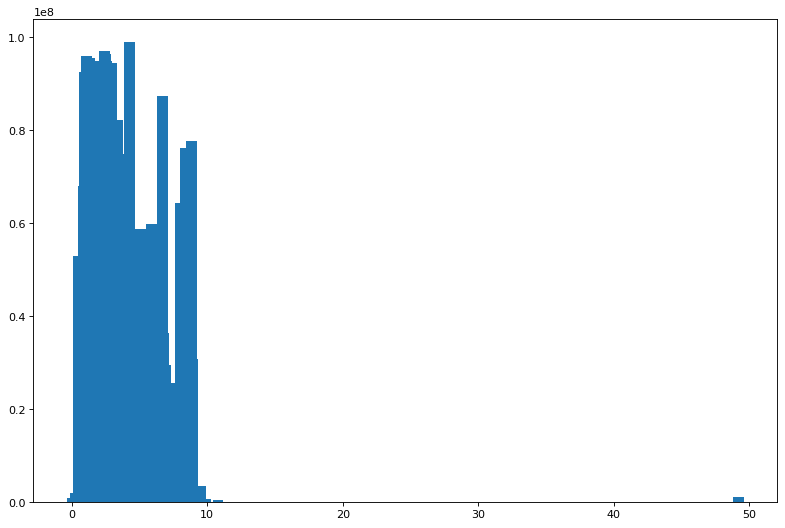

In [21]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df['duration_min'], df['views_int'])
plt.show()

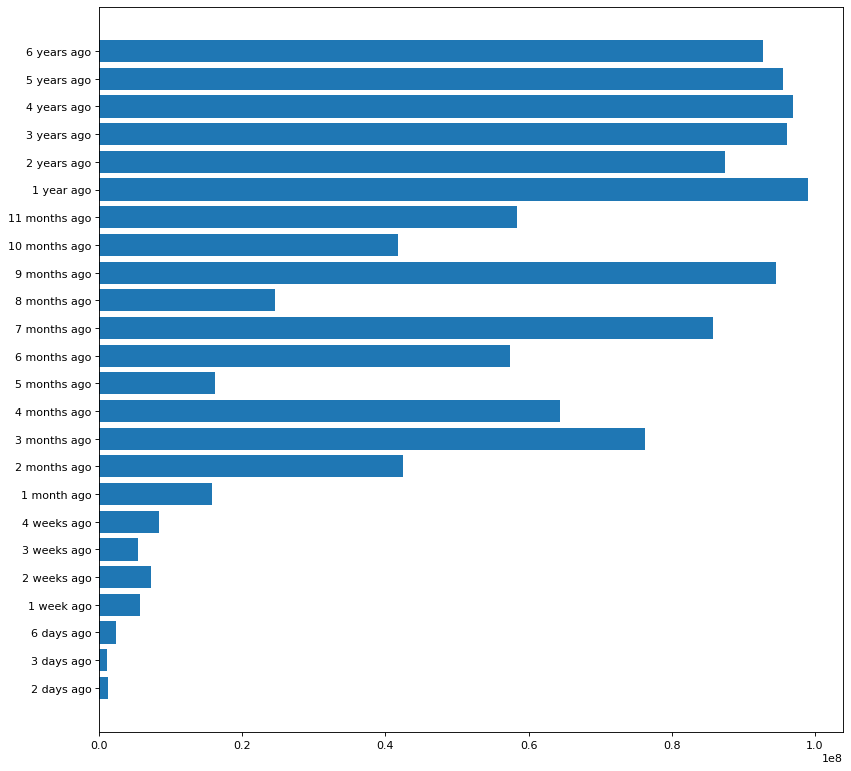

In [22]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.barh(df['date_posted'], df['views_int'])
plt.show()

In [23]:
df.to_csv('discovery_cleaned.csv', index=False)